### 이수안컴퓨터연구소
- Pandas 한번에 끝내기 - 데이터 과학의 핵심 패키지, 데이터 처리, 연산, 집계
- https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=10

## Pandas 특징
- 부동 소수점이 아닌 데이터 뿐만 나이라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
- 크기 변이성(Size mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적(explicit) 데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
- 누락된 데이터 또는 다른 Python 및 NumPy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
- 플랫 파일(CSV 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO 도구
- 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜 이동 및 지연

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.2.4'

##  Pandas 객체
### Series 객체

In [2]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [3]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
s[1]

0.25

In [6]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [7]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [8]:
s['c']

0.5

In [9]:
s[['c','d','e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [10]:
'b' in s

True

In [11]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], index=[2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [12]:
s[:2]

2    0.00
4    0.25
dtype: float64

In [13]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
s.value_counts()

0.00    1
1.00    1
0.50    1
0.75    1
0.25    1
dtype: int64

In [15]:
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [16]:
pop_tuple = {'서울특별시': 9720846,
             '부산광역시': 3404423,
             '인천광역시': 2947271,
             '대구광역시': 2427954,
             '대전광역시': 1741040,
             '광주광역시': 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947271
대구광역시    2427954
대전광역시    1741040
광주광역시    1455048
dtype: int64

In [17]:
population['서울특별시']

9720846

In [18]:
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947271
dtype: int64

### DataFrame 객체

In [19]:
pd.DataFrame([{'A':2, 'B':2, 'D':3}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,2,3.0,NaN
1,4,5,NaN,7.0


In [20]:
pd.DataFrame(np.random.rand(5, 5),
             columns=['A','B','C','D','E'],
             index=[1,2,3,4,5])

,A,B,C,D,E
1,0.026928,0.480964,0.887955,0.459572,0.641282
2,0.425358,0.698798,0.367593,0.804063,0.570344
3,0.436896,0.117285,0.642872,0.798241,0.998395
4,0.485921,0.153968,0.904476,0.883288,0.617259
5,0.491894,0.455819,0.300512,0.110113,0.122170


In [21]:
male_tuple = {'서울특별시': 4732275,
              '부산광역시': 1668618,
              '인천광역시': 1476813,
              '대구광역시': 1198815,
              '대전광역시': 734441,
              '광주광역시': 720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
dtype: int64

In [22]:
female_tuple = {'서울특별시': 4988571,
                '부산광역시': 1735805,
                '인천광역시': 1470404,
                '대구광역시': 1229139,
                '대전광역시': 736599,
                '광주광역시': 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [23]:
korea_df = pd.DataFrame({'인구수' :population,
                         '남자인구수' : male,
                         '여자인구수' : female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947271,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1741040,734441,736599
광주광역시,1455048,720060,734988


In [24]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [25]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [26]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [27]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947271,1476813,1470404


### Index 객체

In [28]:
idx = pd.Index([2,4,6,8,10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [29]:
idx[1]

4

In [30]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [31]:
idx[-1::]

Int64Index([10], dtype='int64')

In [32]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [33]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

In [34]:
idx1 = pd.Index([1,2,4,6,8])
idx2 = pd.Index([2,4,5,6,7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


<ipython-input-34-47eb462ab82c>:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(idx1 & idx2)
<ipython-input-34-47eb462ab82c>:9: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  print(idx1 | idx2)
<ipython-input-34-47eb462ab82c>:12: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(idx1 ^ idx2)


## 인덱싱(Indexing)

In [35]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [36]:
s['b']

0.25

In [37]:
'b' in s

True

In [38]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [39]:
s.items()

In [40]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [41]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [42]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [43]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [44]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [45]:
s[['a','b','c']]

a    0.00
b    0.25
c    0.50
dtype: float64

### Series 인덱싱

In [46]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
               index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [47]:
s[1]

'a'

In [48]:
s[2:4]

5    c
7    d
dtype: object

In [49]:
s.iloc[1]   # 정수값 인덱싱 (0부터~)

'b'

In [50]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [51]:
s.reindex(range(10))   # 인덱스 재설정

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [52]:
s.reindex(range(10), method='bfill')   # 인덱스 재설정 + 이전 값 채우기

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱

In [53]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947271,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1741040,734441,736599
광주광역시,1455048,720060,734988


In [54]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [55]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [56]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [57]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [58]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시     99.707032
광주광역시     97.968946
Name: 남여비율, dtype: float64

In [59]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94727100e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.74104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [60]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947271e+06,2.427954e+06,1.741040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [61]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [62]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947271
대구광역시    2427954
대전광역시    1741040
광주광역시    1455048
Name: 인구수, dtype: int64

In [63]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947271,1476813


In [64]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947271,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [65]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1741040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [66]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947271,1476813,1470404,100.435867


In [67]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947271,1476813,1470404,100.435867


In [68]:
korea_df.loc[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947271,1476813,1470404,100.435867


In [69]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947271,1476813


### 다중 인덱싱(Multi Indexing)
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
- 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [70]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947271,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1741040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [71]:
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020), 
              ('부산광역시', 2010), ('부산광역시', 2020), 
              ('인천광역시', 2010), ('인천광역시', 2020), 
              ('대구광역시', 2010), ('대구광역시', 2020), 
              ('대전광역시', 2010), ('대전광역시', 2020),
              ('광주광역시', 2010), ('광주광역시', 2020), ]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [72]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217,
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [73]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [74]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [75]:
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [76]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [77]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [78]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [79]:
male_tuples = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 733441,
              721780, 720060]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 733441,
 721780,
 720060]

In [80]:
korea_mdf = pd.DataFrame({'총인구수': population,
                           '남자인구수': male_tuples})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   733441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [81]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404,
                 1256431, 1229139,
                 750016, 736599,
                 732586, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732586,
 734988]

In [82]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   733441   736599
광주광역시 2010   1454636   721780   732586
      2020   1455048   720060   734988

In [83]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.571273
광주광역시  2010     98.524951
       2020     97.968946
dtype: float64

In [84]:
ratio.unstack()

,2010,2020
광주광역시,98.524951,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.571273
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [85]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples,
                          '남여비율': ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   733441   736599   99.571273
광주광역시 2010   1454636   721780   732586   98.524951
      2020   1455048   720060   734988   97.968946

#### 다중 인덱스 생성

In [86]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=[['a','a','b','b','c','c'], [1,2,1,2,1,2]],
                  columns=['c1','c2','c3'])
df

c1        c2        c3
a 1  0.937393  0.903955  0.106097
  2  0.513891  0.468272  0.326473
b 1  0.827564  0.165533  0.538691
  2  0.878222  0.749843  0.351773
c 1  0.336639  0.042719  0.517580
  2  0.035168  0.721480  0.756838

In [87]:
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'], [1,2,1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [88]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [89]:
pd.MultiIndex.from_product([['a', 'b', 'c'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [90]:
pd.MultiIndex(levels=[['a','b','c'],[1,2]],
              codes=[[0,0,1,1,2,2],[0,1,0,1,0,1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [91]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [92]:
population.index.names = ['행정구역','년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [93]:
idx = pd.MultiIndex.from_product([['a','b','c'],[1,2]],
                                 names=['name1','name2'])
cols = pd.MultiIndex.from_product([['c1','c2','c3'],[1,2]],
                                  names=['col_name1','col_name2'])
data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -1.00 -0.87  1.22 -0.55 -0.93  2.16
      2     -0.45  0.91  0.15  1.02 -0.50 -3.23
b     1      0.84 -1.77 -0.76 -0.72  1.93 -0.30
      2     -0.08 -0.52  0.55  0.08  0.61 -0.53
c     1      2.40 -0.88 -0.11 -0.82  0.00  0.86
      2     -0.73  1.91  1.44 -0.11 -1.27 -0.36

In [94]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1      1.22 -0.55
      2      0.15  1.02
b     1     -0.76 -0.72
      2      0.55  0.08
c     1     -0.11 -0.82
      2      1.44 -0.11

#### 인덱싱 및 슬라이싱

In [95]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [96]:
population['인천광역시', 2010]

2758296

In [97]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [98]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [99]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [100]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -1.00 -0.87  1.22 -0.55 -0.93  2.16
      2     -0.45  0.91  0.15  1.02 -0.50 -3.23
b     1      0.84 -1.77 -0.76 -0.72  1.93 -0.30
      2     -0.08 -0.52  0.55  0.08  0.61 -0.53
c     1      2.40 -0.88 -0.11 -0.82  0.00  0.86
      2     -0.73  1.91  1.44 -0.11 -1.27 -0.36

In [101]:
mdf['c2', 1]

name1  name2
a      1        1.22
       2        0.15
b      1       -0.76
       2        0.55
c      1       -0.11
       2        1.44
Name: (c2, 1), dtype: float64

In [102]:
mdf.iloc[:3,:4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1     -1.00 -0.87  1.22 -0.55
      2     -0.45  0.91  0.15  1.02
b     1      0.84 -1.77 -0.76 -0.72

In [103]:
mdf.loc[:,('c2',1)]

name1  name2
a      1        1.22
       2        0.15
b      1       -0.76
       2        0.55
c      1       -0.11
       2        1.44
Name: (c2, 1), dtype: float64

In [104]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:,2], idx_slice[:,2]]

,col_name1,c1,c2,c3
,col_name2,2,2,2
name1,name2,,,
a,2,0.91,1.02,-3.23
b,2,-0.52,0.08,-0.53
c,2,1.91,-0.11,-0.36


#### 다중 인덱스 재정렬

In [105]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [106]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   733441   736599   99.571273
광주광역시 2010   1454636   721780   732586   98.524951
      2020   1455048   720060   734988   97.968946

In [107]:
# korea_mdf['서울특별시':'인천광역시']   => UnsortedIndexError
korea_mdf = korea_mdf.sort_index()
korea_mdf   # 가나다순 정렬

총인구수    남자인구수    여자인구수        남여비율
광주광역시 2010   1454636   721780   732586   98.524951
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   733441   736599   99.571273
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [108]:
korea_mdf['서울특별시':'인천광역시']

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [109]:
korea_mdf.unstack(level=0)

총인구수                                                 남자인구수           \
        광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   
2010  1454636  2511676  1503664  2567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남여비율  \
       대전광역시    부산광역시  ...   대전광역시    부산광역시    서울특별시    인천광역시      광주광역시   
2010  753648  1773170  ...  750016  1794740  5201286  1367940  98.524951   
2020  733441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                               
          대구광역시       대전광역시      부산광역시      서울특별시       인천광역시  
2010  99.905606  100.484256  98.798155  98.269140  101.638668  
2020  97.532907   99.571273  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [110]:
korea_mdf.unstack(level=1)

총인구수             남자인구수             여자인구수                 남여비율  \
           2010     2020     2010     2020     2010     2020        2010   
광주광역시   1454636  1455048   721780   720060   732586   734988   98.524951   
대구광역시   2511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전광역시   1503664  1471040   753648   733441   750016   736599  100.484256   
부산광역시   2567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
             2020  
광주광역시   97.968946  
대구광역시   97.532907  
대전광역시   99.571273  
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [111]:
korea_mdf.stack()

광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.325860e+05
             남여비율     9.852495e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     9.796895e+01
대구광역시  2010  총인구수     2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.334410e+05
             여자인구수    7.365990e+05
             남여비율     9.957127e+01
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
       2020  총인구수   

In [112]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
광주광역시 2010   1454636   721780   732586   98.524951
      2020   1455048   720060   734988   97.968946
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   733441   736599   99.571273
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [113]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,level_0,총인구수,남자인구수,여자인구수,남여비율
2010,광주광역시,1454636,721780,732586,98.524951
2020,광주광역시,1455048,720060,734988,97.968946
2010,대구광역시,2511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,733441,736599,99.571273
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140
2020,서울특별시,9720846,4732275,4988571,94.862336


In [114]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,level_0,level_1,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732586,98.524951
1,광주광역시,2020,1455048,720060,734988,97.968946
2,대구광역시,2010,2511676,1255245,1256431,99.905606
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,733441,736599,99.571273
6,부산광역시,2010,2567910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,4732275,4988571,94.862336


In [115]:
# idx_flat.set_index(['행정구역', '년도'])

## 데이터 연산

In [116]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    4
1    5
2    2
3    8
4    6
dtype: int32

In [117]:
df = pd.DataFrame(np.random.randint(0, 10, (3,3)),
                 columns = ['A','B','C'])
df

,A,B,C
0,1,2,1
1,9,1,3
2,7,7,1


In [118]:
np.exp(s)

0      54.598150
1     148.413159
2       7.389056
3    2980.957987
4     403.428793
dtype: float64

In [119]:
np.cos(df * np.pi / 4)

,A,B,C
0,0.707107,6.123234e-17,0.707107
1,0.707107,7.071068e-01,-0.707107
2,0.707107,7.071068e-01,0.707107


In [120]:
s1 = pd.Series([1,3,5,7,9], index=[0,1,2,3,4])
s2 = pd.Series([2,4,6,8,10], index=[1,2,3,4,5])
s1 + s2   # 인덱스 기준  ## 한 쪽에만 있으면 NaN

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [121]:
s1.add(s2, fill_value=0)   # NaN 값 0으로 채우고 더하기

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [122]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3,3)),
                   columns=list('ACD'))
df1

,A,C,D
0,10,19,3
1,11,10,13
2,16,3,8


In [123]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5,5)),
                   columns=list('BAECD'))
df2

,B,A,E,C,D
0,14,18,12,3,16
1,8,15,13,9,11
2,13,16,3,5,13
3,5,12,19,3,6
4,1,5,9,16,9


In [124]:
df1 + df2

,A,B,C,D,E
0,28.0,NaN,22.0,19.0,NaN
1,26.0,NaN,19.0,24.0,NaN
2,32.0,NaN,8.0,21.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [125]:
fvalue = df1.stack().mean()
df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,28.000000,24.333333,22.000000,19.000000,22.333333
1,26.000000,18.333333,19.000000,24.000000,23.333333
2,32.000000,23.333333,8.000000,21.000000,13.333333
3,22.333333,15.333333,13.333333,16.333333,29.333333
4,15.333333,11.333333,26.333333,19.333333,19.333333


### 연산자 범용 함수

#### add()

In [126]:
a = np.random.randint(1, 10, size=(3,3))
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [127]:
a + a[0]

array([[ 4, 18, 18],
       [ 7, 18, 11],
       [ 3, 14, 17]])

In [128]:
df = pd.DataFrame(a, columns=list('ABC'))
df

,A,B,C
0,2,9,9
1,5,9,2
2,1,5,8


In [129]:
df + df.iloc[0]

,A,B,C
0,4,18,18
1,7,18,11
2,3,14,17


In [130]:
df.add(df.iloc[0])

,A,B,C
0,4,18,18
1,7,18,11
2,3,14,17


#### sub() / subtract()

In [131]:
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [132]:
a - a[0]

array([[ 0,  0,  0],
       [ 3,  0, -7],
       [-1, -4, -1]])

In [133]:
df

,A,B,C
0,2,9,9
1,5,9,2
2,1,5,8


In [134]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,3,0,-7
2,-1,-4,-1


In [135]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,3,0,-7
2,-1,-4,-1


In [136]:
df.subtract(df['B'], axis=0)

,A,B,C
0,-7,0,0
1,-4,0,-7
2,-4,0,3


#### mul() / multply()

In [137]:
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [138]:
a * a[0]

array([[ 4, 81, 81],
       [10, 81, 18],
       [ 2, 45, 72]])

In [139]:
df

,A,B,C
0,2,9,9
1,5,9,2
2,1,5,8


In [140]:
df * df.iloc[1]

,A,B,C
0,10,81,18
1,25,81,4
2,5,45,16


In [141]:
df.mul(df.iloc[1])

,A,B,C
0,10,81,18
1,25,81,4
2,5,45,16


In [142]:
df.multiply(df.iloc[2])

,A,B,C
0,2,45,72
1,5,45,16
2,1,25,64


#### truediv() / div() / divide() / floordiv()

In [143]:
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [144]:
a / a[0]

array([[1.        , 1.        , 1.        ],
       [2.5       , 1.        , 0.22222222],
       [0.5       , 0.55555556, 0.88888889]])

In [145]:
df / df.iloc[0]

,A,B,C
0,1.0,1.000000,1.000000
1,2.5,1.000000,0.222222
2,0.5,0.555556,0.888889


In [146]:
df.truediv(df.iloc[0])

,A,B,C
0,1.0,1.000000,1.000000
1,2.5,1.000000,0.222222
2,0.5,0.555556,0.888889


In [147]:
df.div(df.iloc[1])

,A,B,C
0,0.4,1.000000,4.5
1,1.0,1.000000,1.0
2,0.2,0.555556,4.0


In [148]:
df.divide(df.iloc[2])

,A,B,C
0,2.0,1.8,1.125
1,5.0,1.8,0.250
2,1.0,1.0,1.000


In [149]:
a // a[0]

array([[1, 1, 1],
       [2, 1, 0],
       [0, 0, 0]], dtype=int32)

In [150]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,2,1,0
2,0,0,0


#### mod()

In [151]:
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [152]:
a % a[0]

array([[0, 0, 0],
       [1, 0, 2],
       [1, 5, 8]], dtype=int32)

In [153]:
df

,A,B,C
0,2,9,9
1,5,9,2
2,1,5,8


In [154]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,1,0,2
2,1,5,8


#### power()

In [155]:
a

array([[2, 9, 9],
       [5, 9, 2],
       [1, 5, 8]])

In [156]:
a ** a[0]

array([[        4, 387420489, 387420489],
       [       25, 387420489,       512],
       [        1,   1953125, 134217728]], dtype=int32)

In [157]:
df

,A,B,C
0,2,9,9
1,5,9,2
2,1,5,8


In [158]:
df.pow(df.iloc[0])

,A,B,C
0,4,387420489,387420489
1,25,387420489,512
2,1,1953125,134217728


In [159]:
row = df.iloc[0, ::2]
row

A    2
C    9
Name: 0, dtype: int32

In [160]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,3.0,NaN,-7.0
2,-1.0,NaN,-1.0


### 정렬(Sort)

In [161]:
s = pd.Series(range(5), index=['A','D','B','C','E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [162]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [163]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [164]:
df = pd.DataFrame(np.random.randint(0, 10, (4,4)),
                 index=[2,4,1,3],
                 columns=list('BDAC'))
df

,B,D,A,C
2,7,8,5,2
4,2,2,6,7
1,8,2,3,5
3,2,1,9,5


In [165]:
df.sort_index()

,B,D,A,C
1,8,2,3,5
2,7,8,5,2
3,2,1,9,5
4,2,2,6,7


In [166]:
df.sort_values(by='A')   # A 칼럼 정렬을 기준으로

,B,D,A,C
1,8,2,3,5
2,7,8,5,2
4,2,2,6,7
3,2,1,9,5


In [167]:
df.sort_index(axis=1)

,A,B,C,D
2,5,7,2,8
4,6,2,7,2
1,3,8,5,2
3,9,2,5,1


### 순위(Ranking)

In [168]:
s = pd.Series([-2,4,7,3,0,7,5,-4,2,6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [169]:
s.rank()   # 작은 수 부터 1 / 같은 값 n.5로 표현

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [170]:
s.rank(method='first')   # 동일 값의 경우, 앞에 있는 값이 high rank

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [171]:
s.rank(method='max')   # 같은 값 높여 표현 ex. "공동 1등 > 2등" (공동 1등 > 3등 X)

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

nrows, ncols = 10000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

%timeit df1 + df2 + df3 + df4

%timeit pd.eval('df1 + df2 + df3 + df4')

%timeit df1 * -df2 / (-df3 * df4)

%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

df = pd.DataFrame(np.random.rand(1000000, 5), columns=['A','B','C','D','E'])
df.head()

%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

%timeit pd.eval('df.A + df.B / df.C - df.D * df.E')

%timeit df.eval('A + B / C - D * E')

df.eval('R = A + B / C- D * E', inplace=True)
df.head()

df.eval('R = A - B / C + D * E', inplace=True)
df.head()

col_mean = df.mean(1)
df['A'] + col_mean

df.eval('A + @col_mean')

df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

pd.eval('df.A < 0.5) and (df.B < 0.5) and (df.C > 0.5)')

# df.query('(df.A < 0.5) and (df.B < 0.5) and (df.C > 0.5)')

col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

df.query('A < @col_mean and B < @col_mean')

### apply

In [172]:
data =  {'eng':[2,4,6,8],
         'kor':[3,9,12,15],
         'math':[4,8,12,16]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,2,3,4
b,4,9,8
c,6,12,12
d,8,15,16


In [173]:
def fn( v ):
    print('================')
    print( v )
    print('================')
    return v.sum()
df.apply(fn)
df.apply(fn, axis=1)

a    2
b    4
c    6
d    8
Name: eng, dtype: int64
a     3
b     9
c    12
d    15
Name: kor, dtype: int64
a     4
b     8
c    12
d    16
Name: math, dtype: int64
eng     2
kor     3
math    4
Name: a, dtype: int64
eng     4
kor     9
math    8
Name: b, dtype: int64
eng      6
kor     12
math    12
Name: c, dtype: int64
eng      8
kor     15
math    16
Name: d, dtype: int64


a     9
b    21
c    30
d    39
dtype: int64

In [174]:
#  국어,영어,수학 점수의 평균이 70점 이상이면 '합격' 아니면 '불합격' 인 시리즈를 구하시요
# df
df.apply(lambda v: '합격' if v.mean()>=70 else '불합격', axis=1)
# df.mean(axis = 1).apply(lambda v: '합격' if v>= 70 else '불합격')

a    불합격
b    불합격
c    불합격
d    불합격
dtype: object

## 데이터 결합

### Concat() / Append()

In [175]:
s1 = pd.Series(['a','b'], index=[1,2])
s2 = pd.Series(['c','d'], index=[3,4])
pd.concat([s1,s2])

1    a
2    b
3    c
4    d
dtype: object

In [176]:
def create_df(cols, idx):
    data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
    return pd.DataFrame(data, idx)

In [177]:
df1 = create_df('AB', [1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [178]:
df2 = create_df('AB', [3,4])
df2

,A,B
3,a3,b3
4,a4,b4


In [179]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [180]:
df3 = create_df('AB',[0,1])
df3

,A,B
0,a0,b0
1,a1,b1


In [181]:
df4 = create_df('CD', [0,1])
df4

,C,D
0,c0,d0
1,c1,d1


In [182]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [183]:
# pd.concat([df1, df3], verify_integrity=True)   => ValueError
pd.concat([df1, df3], verify_integrity=False)

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [184]:
pd.concat([df1, df3], ignore_index=True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [185]:
pd.concat([df1, df3], keys=['X','Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [186]:
df5 = create_df('ABC',[1,2])
df6 = create_df('BCD',[3,4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [187]:
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [188]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [189]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [190]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


#### 병합과 조인

In [191]:
df1 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '학과':['경영학과','교육학과','컴퓨터학과','통계학과']})
                          
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [192]:
df2 = pd.DataFrame({'학생':['홍길동','이순신','임꺽정','김유신'],
                    '입학년도':[2012, 2016, 2019, 2020]})
df2                    

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [193]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [194]:
df4 = pd.DataFrame({'학과':['경영학과','교육학과','컴퓨터학과','통계학과'],
                   '학과장':['황희','장영실','안창호','정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [195]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [196]:
df5 = pd.DataFrame({'학과':['경영학과','교육학과','교육학과','컴퓨터학과','컴퓨터학과','통계학과'],
                   '과목':['경영개론','기초수학','물리학','프로그래밍','운영체제','확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [197]:
pd.merge(df1, df5)   # 학과 공통 > 학과 기준 > 학생 중복

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [198]:
pd.merge(df1, df2, on='학생')   # 학생 기준

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [199]:
df6 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '성적':['A','A+','B','A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,A+


In [200]:
pd.merge(df1, df6, left_on='학생', right_on='이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,A+


In [201]:
pd.merge(df1, df6, left_on='학생', right_on='이름').drop('이름', axis=1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,A+


In [202]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [203]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [204]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [205]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [206]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [207]:
pd.merge(mdf1, df6, left_index=True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,A+


In [208]:
df7 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정'],
                   '주문음식':['햄버거','피자','짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [209]:
df8 = pd.DataFrame({'이름':['홍길동','이순신','김유신'],
                   '주문음료':['콜라','사이다','커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [210]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [211]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [212]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [213]:
pd.merge(df7, df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [214]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [215]:
df9 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '순위':[3,2,4,1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [216]:
df10 = pd.DataFrame({'이름':['홍길동','이순신','임꺽정','김유신'],
                   '순위':[4,1,3,2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [217]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

### 집계 연산(Aggregation)

In [218]:
df = pd.DataFrame([[1,1.2,np.nan],
                 [2.4,5.5,4.2],
                 [np.nan, np.nan, np.nan],
                 [0.44, -3.1, -4.1]],
                  index=[1,2,3,4],
                  columns=['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [219]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [220]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [221]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [222]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [223]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [224]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [225]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [226]:
print(df)
print(df.sum())
print(df.cumsum())   # 누적합

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [227]:
print(df)
print(df.prod())
print(df.cumprod())  # 누적곱

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [228]:
df.diff()   # 차

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [229]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [230]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [231]:
df.corr()   # 상관관계

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [232]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [233]:
df.cov()   # 공분산

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [234]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [235]:
df['A'].value_counts()

2.40    1
0.44    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [236]:
df = pd.DataFrame({'c1':['a','a','b','b','c','d','d'],
                   'c2':['A','B','B','A','D','C','C'],
                   'c3':np.random.randint(7),
                   'c4':np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,3,0.792791
1,a,B,3,0.205207
2,b,B,3,0.637100
3,b,A,3,0.714935
4,c,D,3,0.113869
5,d,C,3,0.953848
6,d,C,3,0.541219


In [237]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [238]:
df.groupby('c2').get_group('A')

,c1,c2,c3,c4
0,a,A,3,0.792791
3,b,A,3,0.714935


In [239]:
df['c3'].groupby(df['c1']).mean()

c1
a    3
b    3
c    3
d    3
Name: c3, dtype: int64

In [240]:
df['c4'].groupby(df['c2']).std()

c2
A    0.055052
B    0.305395
C    0.291773
D         NaN
Name: c4, dtype: float64

In [241]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.792791
    B     0.205207
b   A     0.714935
    B     0.637100
c   D     0.113869
d   C     0.747533
Name: c4, dtype: float64

In [242]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.792791,0.205207,NaN,NaN
b,0.714935,0.637100,NaN,NaN
c,NaN,NaN,NaN,0.113869
d,NaN,NaN,0.747533,NaN


In [243]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,3,0.498999
b,3,0.676018
c,3,0.113869
d,3,0.747533


In [244]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2              
a  A    3  0.792791
   B    3  0.205207
b  A    3  0.714935
   B    3  0.637100
c  D    3  0.113869
d  C    3  0.747533

In [245]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
c   D     1
d   C     2
dtype: int64

In [246]:
for c1, group in df.groupby('c1') :
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   3  0.792791
1  a  B   3  0.205207
b
  c1 c2  c3        c4
2  b  B   3  0.637100
3  b  A   3  0.714935
c
  c1 c2  c3        c4
4  c  D   3  0.113869
d
  c1 c2  c3        c4
5  d  C   3  0.953848
6  d  C   3  0.541219


In [247]:
for (c1,c2), group in df.groupby(['c1','c2']) :
    print((c1,c2))
    print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   3  0.792791
('a', 'B')
  c1 c2  c3        c4
1  a  B   3  0.205207
('b', 'A')
  c1 c2  c3        c4
3  b  A   3  0.714935
('b', 'B')
  c1 c2  c3      c4
2  b  B   3  0.6371
('c', 'D')
  c1 c2  c3        c4
4  c  D   3  0.113869
('d', 'C')
  c1 c2  c3        c4
5  d  C   3  0.953848
6  d  C   3  0.541219


In [248]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.792791
   B   0.205207
b  A   0.714935
   B   0.637100
c  D   0.113869
d  C   0.747533

In [249]:
df.groupby('c1')['c3'].quantile()

c1
a    3.0
b    3.0
c    3.0
d    3.0
Name: c3, dtype: float64

In [250]:
df.groupby('c1')['c3'].count()

c1
a    2
b    2
c    1
d    2
Name: c3, dtype: int64

In [251]:
df.groupby('c1')['c4'].median()

c1
a    0.498999
b    0.676018
c    0.113869
d    0.747533
Name: c4, dtype: float64

In [252]:
df.groupby('c1')['c4'].std()

c1
a    0.415485
b    0.055038
c         NaN
d    0.291773
Name: c4, dtype: float64

In [253]:
df.groupby(['c1','c2'])['c4'].agg(['mean','min','max'])

mean       min       max
c1 c2                              
a  A   0.792791  0.792791  0.792791
   B   0.205207  0.205207  0.205207
b  A   0.714935  0.714935  0.714935
   B   0.637100  0.637100  0.637100
c  D   0.113869  0.113869  0.113869
d  C   0.747533  0.541219  0.953848

In [254]:
df.groupby(['c1','c2'],as_index=False)['c4'].mean()

,c1,c2,c4
0,a,A,0.792791
1,a,B,0.205207
2,b,A,0.714935
3,b,B,0.637100
4,c,D,0.113869
5,d,C,0.747533


In [255]:
df.groupby(['c1','c2'],group_keys=False)['c4'].mean()

c1  c2
a   A     0.792791
    B     0.205207
b   A     0.714935
    B     0.637100
c   D     0.113869
d   C     0.747533
Name: c4, dtype: float64

In [256]:
def top(df, n=3, column='c1'):
    return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,3,0.637100
3,b,A,3,0.714935
4,c,D,3,0.113869
5,d,C,3,0.953848
6,d,C,3,0.541219


In [257]:
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   3  0.792791
   1  a  B   3  0.205207
b  2  b  B   3  0.637100
   3  b  A   3  0.714935
c  4  c  D   3  0.113869
d  5  d  C   3  0.953848
   6  d  C   3  0.541219

### 피벗 테이블(Pivot Table)

In [258]:
df.pivot_table(['c3','c4'],
               index=['c1'],
               columns=['c2'],
               margins=True)  # All행 추가 (평균) 

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    3.0  3.0  NaN  NaN   3  0.792791  0.205207       NaN       NaN  0.498999
b    3.0  3.0  NaN  NaN   3  0.714935  0.637100       NaN       NaN  0.676018
c    NaN  NaN  NaN  3.0   3       NaN       NaN       NaN  0.113869  0.113869
d    NaN  NaN  3.0  NaN   3       NaN       NaN  0.747533       NaN  0.747533
All  3.0  3.0  3.0  3.0   3  0.753863  0.421153  0.747533  0.113869  0.565567

In [259]:
df.pivot_table(['c3','c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0) 

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    3  3  0  0   6  0.792791  0.205207  0.000000  0.000000  0.997997
b    3  3  0  0   6  0.714935  0.637100  0.000000  0.000000  1.352035
c    0  0  0  3   3  0.000000  0.000000  0.000000  0.113869  0.113869
d    0  0  6  0   6  0.000000  0.000000  1.495067  0.000000  1.495067
All  6  6  6  3  21  1.507726  0.842307  1.495067  0.113869  3.958968

In [260]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,0,0
c,0,0,0,1
d,0,0,2,0


In [261]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,3.0,3.0,NaN,NaN,6
b,3.0,3.0,NaN,NaN,6
c,NaN,NaN,NaN,3.0,3
d,NaN,NaN,6.0,NaN,6
All,6.0,6.0,6.0,3.0,21


### 범주형(Categorical) 데이터

In [262]:
s = pd.Series(['c1','c2','c1','c2','c1']*2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [263]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [264]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [265]:
code = pd.Series([0,1,0,1,0]*2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [266]:
d = pd.Series(['c1','c2'])
d

0    c1
1    c2
dtype: object

In [267]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [268]:
df = pd.DataFrame({'id':np.arange(len(s)),
                  'c':s,
                  'v':np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,1413
1,1,c2,3636
2,2,c1,1185
3,3,c2,3418
4,4,c1,4921
5,5,c1,1057
6,6,c2,1030
7,7,c1,4760
8,8,c2,2046
9,9,c1,2140


In [269]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [270]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [271]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [272]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [273]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [274]:
c = pd.Categorical(['c1','c2','c3','c1','c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [275]:
categories = ['c1','c2','c3']
codes = [0,1,2,0,1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [276]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [277]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [278]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [279]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [280]:
c = c.set_categories(['c1','c2','c3','c4','c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [281]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [282]:
c[c.isin(['c1','c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [283]:
c = c.remove_unused_categories()

In [284]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

### 문자열 연산자

In [285]:
name_tuple = ['Suan Lee','Steven Jobs','Larry Page','Elon Musk',None,'Bill Gates','Mark Zuckerberg','Jeff Bezos']
name_tuple
names = pd.Series(name_tuple)
names

0           Suan Lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill Gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [286]:
names.str.startswith('S')

0     True
1     True
2    False
3    False
4     None
5    False
6    False
7    False
dtype: object

In [287]:
names.str.contains('s')

0    False
1     True
2    False
3     True
4     None
5     True
6    False
7     True
dtype: object

In [288]:
names.isin(['Bill Gates'])

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [289]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [290]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [291]:
names.str.split()

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

### 기타 연산자

In [292]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [293]:
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Musk
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [294]:
names.str.repeat(2)

0                  Suan LeeSuan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill GatesBill Gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [295]:
names.str.join('*')

0                  S*u*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

### 정규표현식

In [296]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [297]:
names.str.findall('([A-Za-z]+)')

0           [Suan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, Gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

In [298]:
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0,1,2,3,4,], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [299]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [300]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [301]:
s['2019']

2019-01-01    0
dtype: int64

### 시계열 데이터 구조

In [302]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019',datetime(2020,1,1),
                        '2nd of Feb, 2020', '2020-Mar-4','20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [303]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [304]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [305]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [306]:
pd.date_range('2020-01-01',periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [307]:
pd.date_range('2020-01-01',periods=7,freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [308]:
pd.date_range('2020-01-01',periods=7,freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [309]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [310]:
idx[2]

NaT

In [311]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [312]:
dates = [datetime(2020,1,1), datetime(2020,1,2),datetime(2020,1,4),datetime(2020,1,7),
        datetime(2020,1,10),datetime(2020,1,11),datetime(2020,1,15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [313]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01    0.150866
2020-01-02   -1.496970
2020-01-04    0.948826
2020-01-07   -0.672960
2020-01-10   -0.797226
2020-01-11   -1.223909
2020-01-15   -1.418526
dtype: float64

In [314]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [315]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [316]:
ts[ts.index[2]]

0.9488264751167219

In [317]:
ts['20200104']

0.9488264751167219

In [318]:
ts['1/4/2020']

0.9488264751167219

In [319]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2017-10-01',periods=1000))
ts

2017-10-01    0.816152
2017-10-02    1.013711
2017-10-03    0.407914
2017-10-04    0.923491
2017-10-05    0.334856
                ...   
2020-06-22   -0.949341
2020-06-23    0.690638
2020-06-24   -0.410978
2020-06-25   -0.192720
2020-06-26    0.442502
Freq: D, Length: 1000, dtype: float64

In [320]:
ts['2020']

2020-01-01    0.684244
2020-01-02   -2.180907
2020-01-03   -0.910567
2020-01-04    0.790817
2020-01-05   -0.765006
                ...   
2020-06-22   -0.949341
2020-06-23    0.690638
2020-06-24   -0.410978
2020-06-25   -0.192720
2020-06-26    0.442502
Freq: D, Length: 178, dtype: float64

In [321]:
ts['2020-06']

2020-06-01    0.090781
2020-06-02    0.307766
2020-06-03    0.736490
2020-06-04   -0.147053
2020-06-05   -0.826005
2020-06-06   -0.072411
2020-06-07   -1.545340
2020-06-08    0.663530
2020-06-09    1.491104
2020-06-10   -0.279088
2020-06-11    0.421953
2020-06-12   -1.638157
2020-06-13   -0.987947
2020-06-14    0.322610
2020-06-15    0.364774
2020-06-16    1.001440
2020-06-17   -1.598473
2020-06-18    0.285374
2020-06-19   -0.974209
2020-06-20   -1.416128
2020-06-21   -0.950118
2020-06-22   -0.949341
2020-06-23    0.690638
2020-06-24   -0.410978
2020-06-25   -0.192720
2020-06-26    0.442502
Freq: D, dtype: float64

In [322]:
ts[datetime(2020, 6, 20):]

2020-06-20   -1.416128
2020-06-21   -0.950118
2020-06-22   -0.949341
2020-06-23    0.690638
2020-06-24   -0.410978
2020-06-25   -0.192720
2020-06-26    0.442502
Freq: D, dtype: float64

In [323]:
ts['2020-06-10':'2020-06-20']

2020-06-10   -0.279088
2020-06-11    0.421953
2020-06-12   -1.638157
2020-06-13   -0.987947
2020-06-14    0.322610
2020-06-15    0.364774
2020-06-16    1.001440
2020-06-17   -1.598473
2020-06-18    0.285374
2020-06-19   -0.974209
2020-06-20   -1.416128
Freq: D, dtype: float64

In [324]:
tdf = pd.DataFrame(np.random.randn(1000,4), 
                   index=pd.date_range('2017-10-01', periods=1000),
                   columns=['A','B','C','D'])
tdf

,A,B,C,D
2017-10-01,-1.513840,2.294833,1.233737,0.435519
2017-10-02,0.234447,-0.470325,0.088510,1.613978
2017-10-03,0.282502,0.584776,0.798963,1.344407
2017-10-04,0.083181,0.672190,0.218090,0.743669
2017-10-05,0.937196,-2.172784,0.433777,0.978377
...,...,...,...,...
2020-06-22,-0.088395,0.742159,-0.090571,0.711823
2020-06-23,-1.015966,0.613245,2.940797,0.834003
2020-06-24,-0.147439,1.196172,0.824444,0.042679
2020-06-25,0.459783,-1.961394,-0.157030,0.569038


In [325]:
tdf['2020']

<ipython-input-325-8f66df2f472c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,0.360791,-0.725149,-0.721060,0.179437
2020-01-02,-0.698001,-1.046394,0.988930,-1.016198
2020-01-03,1.300343,0.120624,0.491155,-0.611209
2020-01-04,-0.843099,2.309284,1.199572,-0.121713
2020-01-05,-0.588018,0.117967,0.730220,-0.401970
...,...,...,...,...
2020-06-22,-0.088395,0.742159,-0.090571,0.711823
2020-06-23,-1.015966,0.613245,2.940797,0.834003
2020-06-24,-0.147439,1.196172,0.824444,0.042679
2020-06-25,0.459783,-1.961394,-0.157030,0.569038


In [326]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,2.216694,-0.475048,0.381137,-0.900383
2020-06-02,0.465418,0.970891,-0.438542,1.293660
2020-06-03,-0.753534,-0.616527,1.072544,0.194744
2020-06-04,-0.747145,1.418635,-0.620912,2.647528
2020-06-05,-1.751693,0.708697,-0.747850,-1.702059
2020-06-06,-0.232343,-0.726120,-0.930333,0.321807
2020-06-07,0.279244,1.155398,-0.608384,-0.058371
2020-06-08,0.363562,-0.026513,-0.739873,-0.992115
2020-06-09,0.328596,-0.120596,1.101444,1.521250
2020-06-10,-0.888511,-1.067090,0.903612,-1.237550


In [327]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.358166,-0.066371,0.252756,-0.079706
2020-06-21,1.203702,-1.107226,-0.590897,-0.948343
2020-06-22,-0.088395,0.742159,-0.090571,0.711823
2020-06-23,-1.015966,0.613245,2.940797,0.834003
2020-06-24,-0.147439,1.196172,0.824444,0.042679
2020-06-25,0.459783,-1.961394,-0.157030,0.569038
2020-06-26,-0.308370,-0.790464,-0.608497,0.532473


In [328]:
tdf['C']

2017-10-01    1.233737
2017-10-02    0.088510
2017-10-03    0.798963
2017-10-04    0.218090
2017-10-05    0.433777
                ...   
2020-06-22   -0.090571
2020-06-23    2.940797
2020-06-24    0.824444
2020-06-25   -0.157030
2020-06-26   -0.608497
Freq: D, Name: C, Length: 1000, dtype: float64

In [329]:
ts = pd.Series(np.random.randn(10),
               index=pd.DatetimeIndex(['2020-01-01','2020-01-01','2020-01-02',
                                       '2020-01-02','2020-01-03','2020-01-04',
                                       '2020-01-05','2020-01-05','2020-01-06',
                                       '2020-01-07']))
ts

2020-01-01   -0.704021
2020-01-01    0.922218
2020-01-02   -0.505446
2020-01-02   -1.019289
2020-01-03   -1.011020
2020-01-04    0.484343
2020-01-05   -0.915054
2020-01-05    0.359144
2020-01-06   -1.530947
2020-01-07   -0.361265
dtype: float64

In [330]:
ts.index.is_unique

False

In [331]:
ts['2020-01-01']

2020-01-01   -0.704021
2020-01-01    0.922218
dtype: float64

In [332]:
ts.groupby(level=0).mean()

2020-01-01    0.109098
2020-01-02   -0.762367
2020-01-03   -1.011020
2020-01-04    0.484343
2020-01-05   -0.277955
2020-01-06   -1.530947
2020-01-07   -0.361265
dtype: float64

In [333]:
pd.date_range('2020-01-01','2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [334]:
pd.date_range(start='2020-01-01',periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [335]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [336]:
pd.date_range('2020-07-01','2020-07-7', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

In [337]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [338]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [339]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [340]:
pd.date_range('2020-01-01',periods=20,freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [341]:
pd.date_range('2020-01-01',periods=30,freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [342]:
pd.date_range('2020-01-01',periods=20,freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shfit)

In [343]:
ts = pd.Series(np.random.randn(5), index=pd.date_range('2020-01-01', periods=5,freq='B'))
ts

2020-01-01   -1.259629
2020-01-02   -0.679310
2020-01-03    0.835828
2020-01-06    0.267494
2020-01-07    0.505259
Freq: B, dtype: float64

In [344]:
ts.shift(1)

2020-01-01         NaN
2020-01-02   -1.259629
2020-01-03   -0.679310
2020-01-06    0.835828
2020-01-07    0.267494
Freq: B, dtype: float64

In [345]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -1.259629
2020-01-07   -0.679310
Freq: B, dtype: float64

In [346]:
ts.shift(-2)

2020-01-01    0.835828
2020-01-02    0.267494
2020-01-03    0.505259
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [347]:
ts.shift(3, freq='B')

2020-01-06   -1.259629
2020-01-07   -0.679310
2020-01-08    0.835828
2020-01-09    0.267494
2020-01-10    0.505259
Freq: B, dtype: float64

In [348]:
ts.shift(2, freq='W')

2020-01-12   -1.259629
2020-01-12   -0.679310
2020-01-12    0.835828
2020-01-19    0.267494
2020-01-19    0.505259
dtype: float64

### 시간대 처리

In [349]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [350]:
tz = pytz.timezone('Asia/Seoul')

In [351]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00    0.194430
2020-01-02 09:00:00    0.171766
2020-01-03 09:00:00    0.370031
2020-01-06 09:00:00   -0.487001
2020-01-07 09:00:00   -1.406413
2020-01-08 09:00:00   -0.726196
2020-01-09 09:00:00    0.347594
Freq: B, dtype: float64

In [352]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [353]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.194430
2020-01-02 09:00:00+00:00    0.171766
2020-01-03 09:00:00+00:00    0.370031
2020-01-06 09:00:00+00:00   -0.487001
2020-01-07 09:00:00+00:00   -1.406413
2020-01-08 09:00:00+00:00   -0.726196
2020-01-09 09:00:00+00:00    0.347594
Freq: B, dtype: float64

In [354]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [355]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.194430
2020-01-02 18:00:00+09:00    0.171766
2020-01-03 18:00:00+09:00    0.370031
2020-01-06 18:00:00+09:00   -0.487001
2020-01-07 18:00:00+09:00   -1.406413
2020-01-08 18:00:00+09:00   -0.726196
2020-01-09 18:00:00+09:00    0.347594
Freq: B, dtype: float64

In [356]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.194430
2020-01-02 09:00:00+09:00    0.171766
2020-01-03 09:00:00+09:00    0.370031
2020-01-06 09:00:00+09:00   -0.487001
2020-01-07 09:00:00+09:00   -1.406413
2020-01-08 09:00:00+09:00   -0.726196
2020-01-09 09:00:00+09:00    0.347594
dtype: float64

In [357]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.194430
2020-01-02 00:00:00+00:00    0.171766
2020-01-03 00:00:00+00:00    0.370031
2020-01-06 00:00:00+00:00   -0.487001
2020-01-07 00:00:00+00:00   -1.406413
2020-01-08 00:00:00+00:00   -0.726196
2020-01-09 00:00:00+00:00    0.347594
dtype: float64

In [358]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.194430
2020-01-02 01:00:00+01:00    0.171766
2020-01-03 01:00:00+01:00    0.370031
2020-01-06 01:00:00+01:00   -0.487001
2020-01-07 01:00:00+01:00   -1.406413
2020-01-08 01:00:00+01:00   -0.726196
2020-01-09 01:00:00+01:00    0.347594
dtype: float64

In [359]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [360]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [361]:
stamp_utc.value

1577880000000000000

In [362]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [363]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [364]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [365]:
stamp_utc.value

1577880000000000000

In [366]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [367]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [368]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [369]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [370]:
ts_utc

2020-01-01 09:00:00+00:00    0.194430
2020-01-02 09:00:00+00:00    0.171766
2020-01-03 09:00:00+00:00    0.370031
2020-01-06 09:00:00+00:00   -0.487001
2020-01-07 09:00:00+00:00   -1.406413
2020-01-08 09:00:00+00:00   -0.726196
2020-01-09 09:00:00+00:00    0.347594
Freq: B, dtype: float64

In [371]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[:5].tz_convert('America/New_York')
ts = ts1 + ts2

In [372]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [373]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [374]:
p + 2

Period('2022', 'A-JAN')

In [375]:
p - 3

Period('2017', 'A-JAN')

In [376]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [377]:
pr = pd.period_range('2020-01-01','2020-06-30',freq='M')

In [378]:
pd.Series(np.random.randn(6), index=pr)

2020-01    0.487987
2020-02   -0.690476
2020-03    0.719775
2020-04   -0.757204
2020-05    1.320956
2020-06   -1.686362
Freq: M, dtype: float64

In [379]:
pidx = pd.PeriodIndex(['2020-1','2020-2','2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [380]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [381]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [382]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [383]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [384]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [385]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [386]:
pr = pd.period_range('2010','2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    0.682940
2011   -0.011328
2012    0.388419
2013   -0.163863
2014   -0.337130
2015    2.341461
2016    1.420635
2017   -0.879552
2018    1.640395
2019   -0.125247
2020    1.123192
Freq: A-JAN, dtype: float64

In [387]:
ts.asfreq('M', how='start')

2009-02    0.682940
2010-02   -0.011328
2011-02    0.388419
2012-02   -0.163863
2013-02   -0.337130
2014-02    2.341461
2015-02    1.420635
2016-02   -0.879552
2017-02    1.640395
2018-02   -0.125247
2019-02    1.123192
Freq: M, dtype: float64

In [388]:
ts.asfreq('M', how='end')

2010-01    0.682940
2011-01   -0.011328
2012-01    0.388419
2013-01   -0.163863
2014-01   -0.337130
2015-01    2.341461
2016-01    1.420635
2017-01   -0.879552
2018-01    1.640395
2019-01   -0.125247
2020-01    1.123192
Freq: M, dtype: float64

In [389]:
ts.asfreq('B', how='end')

2010-01-29    0.682940
2011-01-31   -0.011328
2012-01-31    0.388419
2013-01-31   -0.163863
2014-01-31   -0.337130
2015-01-30    2.341461
2016-01-29    1.420635
2017-01-31   -0.879552
2018-01-31    1.640395
2019-01-31   -0.125247
2020-01-31    1.123192
Freq: B, dtype: float64

In [390]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [391]:
p.asfreq('D','start')

Period('2019-05-01', 'D')

In [392]:
p.asfreq('D','end')

Period('2019-07-31', 'D')

In [393]:
pr = pd.period_range('2019Q3','2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [394]:
pr = pd.date_range('2020-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31   -1.456151
2020-04-30   -0.141199
2020-07-31   -0.826269
2020-10-31    1.616798
2021-01-31   -1.271226
Freq: Q-JAN, dtype: float64

In [395]:
ts.to_period()

2020Q4   -1.456151
2021Q1   -0.141199
2021Q2   -0.826269
2021Q3    1.616798
2021Q4   -1.271226
Freq: Q-JAN, dtype: float64

In [396]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01    0.418572
2020-01-02   -0.397400
2020-01-03    0.389243
2020-01-04    0.974436
2020-01-05   -1.116328
Freq: D, dtype: float64

In [397]:
p = ts.to_period('M')
p

2020-01    0.418572
2020-01   -0.397400
2020-01    0.389243
2020-01    0.974436
2020-01   -1.116328
Freq: M, dtype: float64

In [398]:
p.to_timestamp(how='start')

2020-01-01    0.418572
2020-01-01   -0.397400
2020-01-01    0.389243
2020-01-01    0.974436
2020-01-01   -1.116328
dtype: float64

### 리샘플링(Resampling)
- 리샘플링(Resampling): 시계열의 빈도 변환
- 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
- 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

In [399]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01    0.174265
2020-01-02   -1.414728
2020-01-03    1.153568
2020-01-04    0.878039
2020-01-05   -1.616333
                ...   
2020-07-14   -1.417229
2020-07-15    2.666835
2020-07-16    0.855217
2020-07-17    0.647412
2020-07-18   -0.411737
Freq: D, Length: 200, dtype: float64

In [400]:
ts.resample('M').mean()

2020-01-31    0.006360
2020-02-29   -0.350342
2020-03-31    0.079472
2020-04-30    0.025839
2020-05-31    0.295347
2020-06-30   -0.016507
2020-07-31    0.294492
Freq: M, dtype: float64

In [401]:
ts.resample('M',kind='period').mean()

2020-01    0.006360
2020-02   -0.350342
2020-03    0.079472
2020-04    0.025839
2020-05    0.295347
2020-06   -0.016507
2020-07    0.294492
Freq: M, dtype: float64

In [402]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [403]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [404]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [405]:
# ts.resample('2T', closed='rihgt', label='right', loffset='1s').sum()

In [406]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [407]:
df = pd.DataFrame(np.random.randn(10,4),
                  index=pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,-0.744945,0.899415,1.256366,-1.148183
2019-11-30,0.306835,0.900824,1.682965,3.069080
2019-12-31,-1.810447,-1.419980,1.188735,0.926003
2020-01-31,0.120198,-1.300487,0.778518,0.168252
2020-02-29,-0.742134,-0.400354,1.133737,1.160431
2020-03-31,0.364468,0.156537,1.070441,0.364044
2020-04-30,0.270113,1.671328,0.636956,0.731873
2020-05-31,-0.331622,0.287331,-1.120835,-0.654303
2020-06-30,-0.719803,-0.195947,-0.350362,-0.837813
2020-07-31,-1.132525,0.450184,-2.140361,-0.648101


In [408]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-1.810447,-1.41998,1.188735,0.926003
2020-12-31,NaN,NaN,NaN,NaN


In [409]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [410]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [411]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 01:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 02:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 03:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 04:00:00,-0.744945,0.899415,1.256366,-1.148183
...,...,...,...,...
2020-07-30 20:00:00,-0.719803,-0.195947,-0.350362,-0.837813
2020-07-30 21:00:00,-0.719803,-0.195947,-0.350362,-0.837813
2020-07-30 22:00:00,-0.719803,-0.195947,-0.350362,-0.837813
2020-07-30 23:00:00,-0.719803,-0.195947,-0.350362,-0.837813


In [412]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 01:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 02:00:00,-0.744945,0.899415,1.256366,-1.148183
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [413]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.749519,0.126753,1.376022,0.948966
2020-03-31,-0.085823,-0.514768,0.994232,0.564242
2020-06-30,-0.260437,0.587570,-0.278080,-0.253414
2020-09-30,-1.132525,0.450184,-2.140361,-0.648101


In [414]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.749519,0.126753,1.376022,0.948966
2020-12-31,-0.310186,0.095513,0.001156,0.040626


### 무빙 윈도우(Moving Window)

In [415]:
df = pd.DataFrame(np.random.randn(300,4),
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2020-01-01,0.525309,-0.304561,-0.470661,0.735471
2020-01-02,-1.633488,-0.780191,0.339826,0.199620
2020-01-03,0.075763,0.621462,-0.429639,1.137813
2020-01-04,0.311780,0.510313,-0.627572,0.732242
2020-01-05,-0.806964,-1.364037,-0.270943,-0.514627
...,...,...,...,...
2020-10-22,-1.291921,1.428224,-1.191305,-0.340915
2020-10-23,-1.187777,-0.368460,1.538547,0.120064
2020-10-24,-0.019878,-1.837528,-0.340275,0.426497
2020-10-25,0.361227,-0.841446,-1.461465,0.126763


<AxesSubplot:>

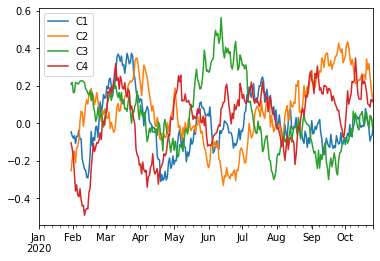

In [416]:
df.rolling(30).mean().plot()

<AxesSubplot:>

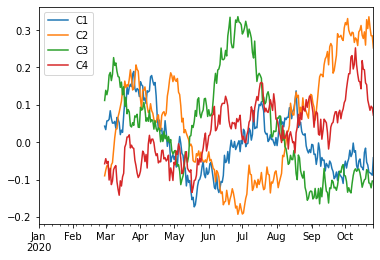

In [417]:
df.rolling(60).mean().plot()

<AxesSubplot:>

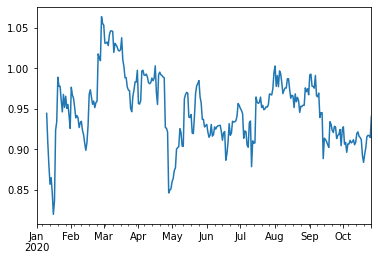

In [418]:
df.C1.rolling(60,min_periods=10).std().plot()

<AxesSubplot:>

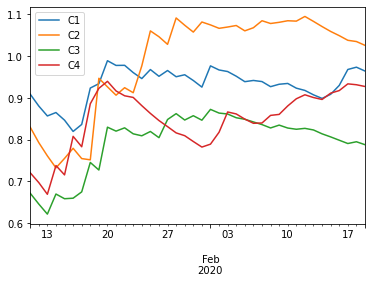

In [419]:
df.rolling(60,min_periods=10).std()[10:50].plot()

<AxesSubplot:>

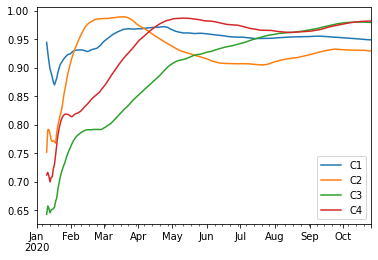

In [420]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

<AxesSubplot:>

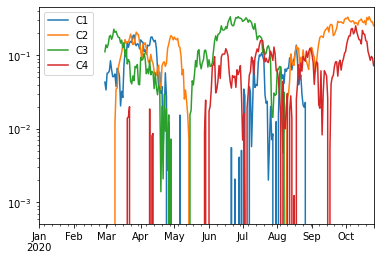

In [421]:
df.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

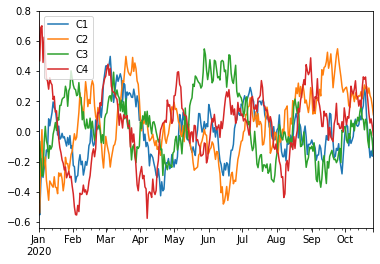

In [422]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

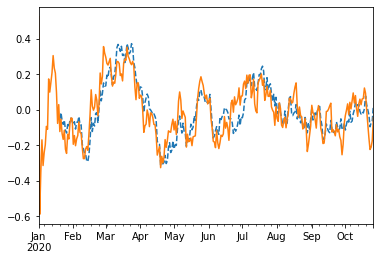

In [423]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:>

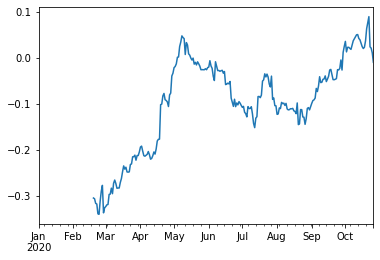

In [424]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot:>

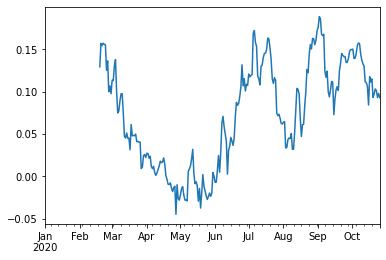

In [425]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

## 데이터 읽기 및 저장
### 텍스트 파일 읽기/쓰기

In [426]:
# csv 파일 생성   <= 지워야 함
# %%writefile example1.csv
# a,b,c,d,e,text
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv

In [427]:
# pd.read_csv('example1.csv')

In [428]:
# csv 파일 생성, header X  <= 지워야 함
# %%writefile example2.csv
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv

In [429]:
# pd.read_csv('example2.csv', header=None)

In [430]:
# pd.read_csv('example2.csv', names=['a','b','c','d','e','text'])

In [431]:
# pd.read_csv('example2.csv', names=['a','b','c','d','e','text'], index_col='text')

In [432]:
# txt 파일 생성, space 분리
# %%writefile example3.txt
#     a    b    c
# 1  0.1  0.2  0.3
# 2  0.4  0.5  0.6
# 3  0.7  0.8  0.9

In [433]:
# pd.read_table('example3.txt', sep='\s+')

In [434]:
# 중간에 글있는 csv
# %%writefile example4.csv
# # 파일 생성
# a, b, c, d, e, text
# # 컬럼은 a, b, c, d, e와 text가 있음
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv

In [435]:
# pd.read_csv('example4.csv', skiprows=[0,2])

In [436]:
# 누락값
# %%writefile example5.csv
# a, b, c, d, e, text
# 1,2,NA,4,5,hi
# 6,7,8,NULL,10,pandas
# 11,NA,13,14,15,csv

In [437]:
# pd.read_csv('example5.csv')

In [438]:
# %%writefile example6.csv
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv6.csv
# a, b, c, d, e, text
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv
# 1,2,3,4,5,hi
# 6,7,8,9,10,pandas
# 11,12,13,14,15,csv

In [439]:
# pd.read_csv('example6.csv',nrows=5)

In [440]:
# df=pd.read_csv('example6.csv')
df

,C1,C2,C3,C4
2020-01-01,0.525309,-0.304561,-0.470661,0.735471
2020-01-02,-1.633488,-0.780191,0.339826,0.199620
2020-01-03,0.075763,0.621462,-0.429639,1.137813
2020-01-04,0.311780,0.510313,-0.627572,0.732242
2020-01-05,-0.806964,-1.364037,-0.270943,-0.514627
...,...,...,...,...
2020-10-22,-1.291921,1.428224,-1.191305,-0.340915
2020-10-23,-1.187777,-0.368460,1.538547,0.120064
2020-10-24,-0.019878,-1.837528,-0.340275,0.426497
2020-10-25,0.361227,-0.841446,-1.461465,0.126763


In [441]:
# 저장
# df.to_csv('output.csv')

In [442]:
# !cat output.csv

In [443]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [444]:
# ts.to_csv('ts.csv', header=['value'])

In [445]:
# !cat ts.csv

In [446]:
# %%writefile example.json
# [{"a":1, "b":2, "c":3, "d":4, "e":5},
#  {"a":6, "b":7, "c":8, "d":9, "e":10},
#  {"a":11, "b":12, "c":13, "d":14, "e":15}]

In [447]:
# pd.read_json('example.json')

In [448]:
# ts.to_json("output.json")

In [449]:
# !cat output.json

In [450]:
# df.to_json('output.json')

In [451]:
# !cat output.json

### 이진 데이터 파일 읽기/쓰기

In [452]:
# df = pd.read_csv('example1.csv')
# df

In [453]:
# df.to_pickle('df_pickle')
# pd.read_pickle('df_pickle')

In [454]:
df = pd.DataFrame({'a':np.random.randn(100),
                   'b':np.random.randn(100),
                   'c':np.random.randn(100)})
df

,a,b,c
0,-1.077312,0.633188,1.463231
1,-1.324998,-0.420588,1.463356
2,-0.521167,0.653301,0.308019
3,0.534771,-1.425494,0.484675
4,-0.235613,-0.209249,-0.058343
...,...,...,...
95,0.726754,-0.773795,-1.754624
96,0.832656,-1.043878,1.990627
97,0.491314,0.316784,1.579532
98,0.361706,-0.652454,2.359940


In [455]:
h = pd.HDFStore('date.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [456]:
h['obj1']

,a,b,c
0,-1.077312,0.633188,1.463231
1,-1.324998,-0.420588,1.463356
2,-0.521167,0.653301,0.308019
3,0.534771,-1.425494,0.484675
4,-0.235613,-0.209249,-0.058343
...,...,...,...
95,0.726754,-0.773795,-1.754624
96,0.832656,-1.043878,1.990627
97,0.491314,0.316784,1.579532
98,0.361706,-0.652454,2.359940


In [457]:
# table 형태로 저장
h.put('obj2',df,format='table')

In [458]:
h.select('obj2', where=['index>50 and index<=60'])

,a,b,c
51,-0.847738,-0.673146,-2.974422
52,0.729622,1.078870,-1.445163
53,-0.815638,-0.165316,0.947276
54,0.376144,0.389905,-0.007017
55,1.386868,0.679825,-1.100631
56,-0.400817,-0.018598,-0.540165
57,-1.004614,0.480867,-1.757457
58,-1.685942,0.005216,-0.892913
59,-3.471966,0.206265,-1.688912
60,1.070273,-1.494112,1.218680


In [459]:
h.close()

In [460]:
# df.to_hdf('data.h5','obj3',format='table')

In [461]:
# pd.read_hdf('data.h5','obj3',where=['index<10'])

In [462]:
# df.to_excel('example.xlsx','Sheet1')

In [463]:
# pd.read_excel('example.xlsx','Sheet1')

## 데이터 정제
### 누락값 처리
- 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
- 서로 다른 데이터들은 다른 형태의 결측을 가짐
- 결측 데이터는 null, NaN, NA로 표시

- None: 파이썬 누락 데이터
- NaN: 누락된 수치 데이터

In [464]:
a = np.array([1,2,None,4,5])
a
# a.sum()   # TypeError

array([1, 2, None, 4, 5], dtype=object)

In [465]:
a = np.array([1,2,np.nan,4,5])   # np.nan
a.dtype

dtype('float64')

In [466]:
0 + np.nan

nan

In [467]:
np.nan + np.nan

nan

In [468]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [469]:
# NaN 포함 계산
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [470]:
# None => NaN
pd.Series([1,2,np.nan,4,None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [471]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [472]:
s[0] = None
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [473]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

- Null 값 처리

In [474]:
s = pd.Series([1,2,np.nan,'String',None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [475]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [476]:
# None, NaN 아닌 것 출력
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [477]:
# None, NaN 삭제
s.dropna()

0         1
1         2
3    String
dtype: object

In [478]:
df.dropna(axis='columns')   # axis: index or columns / how: any or all

,a,b,c
0,-1.077312,0.633188,1.463231
1,-1.324998,-0.420588,1.463356
2,-0.521167,0.653301,0.308019
3,0.534771,-1.425494,0.484675
4,-0.235613,-0.209249,-0.058343
...,...,...,...
95,0.726754,-0.773795,-1.754624
96,0.832656,-1.043878,1.990627
97,0.491314,0.316784,1.579532
98,0.361706,-0.652454,2.359940


In [479]:
df[3] = np.nan
df

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [480]:
df.dropna(axis='columns', how='all')

,a,b,c
0,-1.077312,0.633188,1.463231
1,-1.324998,-0.420588,1.463356
2,-0.521167,0.653301,0.308019
3,0.534771,-1.425494,0.484675
4,-0.235613,-0.209249,-0.058343
...,...,...,...
95,0.726754,-0.773795,-1.754624
96,0.832656,-1.043878,1.990627
97,0.491314,0.316784,1.579532
98,0.361706,-0.652454,2.359940


In [481]:
# 행 범위 지정
df.dropna(axis='rows', thresh=3)

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [482]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [483]:
# None, NaN을 0으로 채우기
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [484]:
# None, NaN을 앞 값으로 채우기
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [485]:
# None, NaN을 뒤 값으로 채우기
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [486]:
df

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [487]:
df.fillna(method='ffill', axis=0)

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [488]:
df.fillna(method='ffill', axis=1)

,a,b,c,3
0,-1.077312,0.633188,1.463231,1.463231
1,-1.324998,-0.420588,1.463356,1.463356
2,-0.521167,0.653301,0.308019,0.308019
3,0.534771,-1.425494,0.484675,0.484675
4,-0.235613,-0.209249,-0.058343,-0.058343
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,-1.754624
96,0.832656,-1.043878,1.990627,1.990627
97,0.491314,0.316784,1.579532,1.579532
98,0.361706,-0.652454,2.359940,2.359940


In [489]:
df.fillna(method='bfill', axis=0)

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [490]:
df.fillna(method='bfill', axis=1)

,a,b,c,3
0,-1.077312,0.633188,1.463231,NaN
1,-1.324998,-0.420588,1.463356,NaN
2,-0.521167,0.653301,0.308019,NaN
3,0.534771,-1.425494,0.484675,NaN
4,-0.235613,-0.209249,-0.058343,NaN
...,...,...,...,...
95,0.726754,-0.773795,-1.754624,NaN
96,0.832656,-1.043878,1.990627,NaN
97,0.491314,0.316784,1.579532,NaN
98,0.361706,-0.652454,2.359940,NaN


In [491]:
df.drop(index=1, columns='a', inplace=True)

In [492]:
df.head()

,b,c,3
0,0.633188,1.463231,NaN
2,0.653301,0.308019,NaN
3,-1.425494,0.484675,NaN
4,-0.209249,-0.058343,NaN
5,-0.843012,0.407604,NaN


In [493]:
# columns 순서 변경
df = df[ [list(df.columns)[-1]] + list(df.columns)[0:-1] ]
# df = df[[3, 'b', 'c']]

In [494]:
df.head()

,3,b,c
0,NaN,0.633188,1.463231
2,NaN,0.653301,0.308019
3,NaN,-1.425494,0.484675
4,NaN,-0.209249,-0.058343
5,NaN,-0.843012,0.407604


### 중복 제거

In [495]:
df = pd.DataFrame({'c1':['a','b','c']*2 + ['b'] + ['c'],
                   'c2':[1,2,1,1,2,3,3,4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [496]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [497]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [498]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [499]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [500]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [501]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

In [502]:
df.head()

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2


In [503]:
df['c1'].replace({'a':'A', 'b':'B'}, inplace=True)
df.head()

,c1,c2
0,A,1
1,B,2
2,c,1
3,A,1
4,B,2


## 참고문헌
- Pandas 사이트: https://pandas.pydata.org/
- Jake VanderPlas. "Python Data Science Handbook", O'Reilly
- Wes Mckinney, "Python for Data Analysis", O'Reilly